# Исследование объявлений о продаже квартир

## Описание проекта 

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**Описание данных**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Открываю файл с данными и изучаю общую информацию. 

Импортирую pandas для получения данных, затем строю гистограммы каждого столбца

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00   

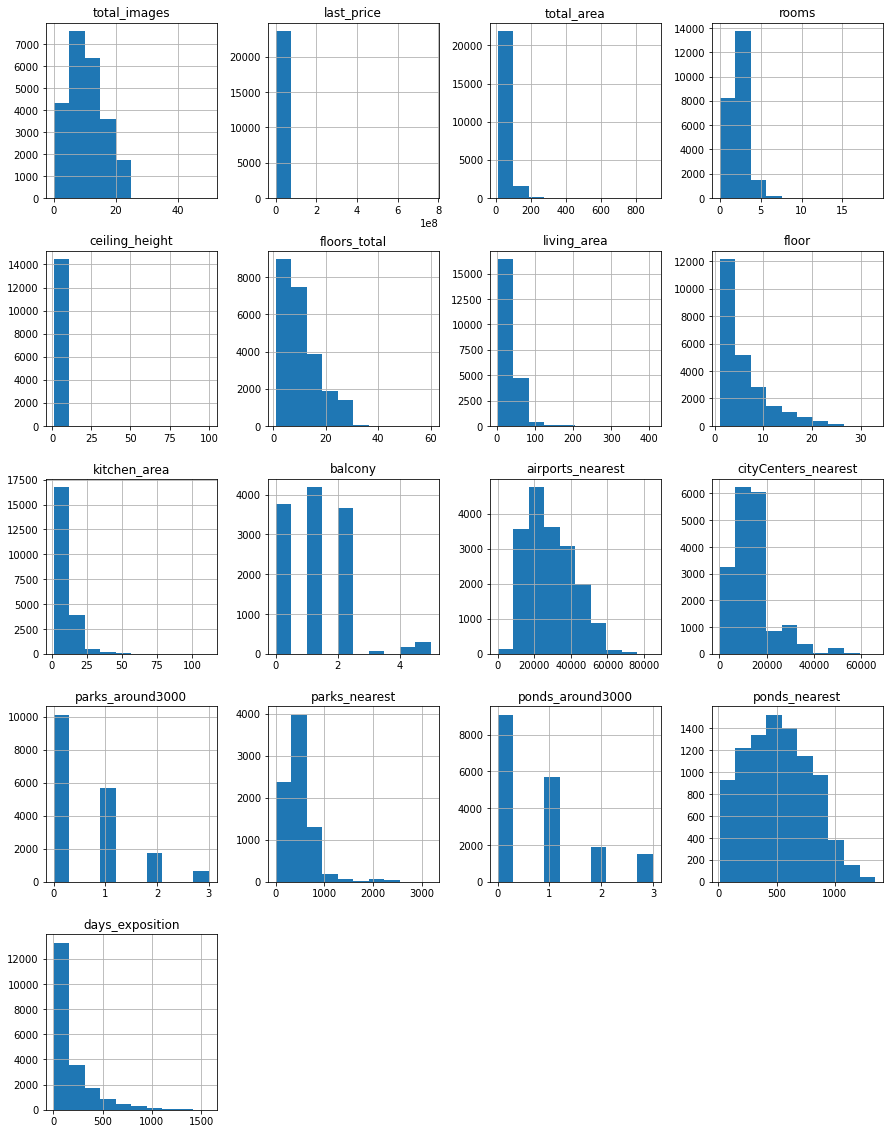

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head(20))
print()
data.info()
print()
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

Изменяю типы данных в тех столбцах, где это возможно без заполнения значений

In [2]:
data['last_price'] = data['last_price'].astype('int')

Заменяю пропущенные значения на 0 в столбцах, в которых посчитал это приемлемым, а также сразу изменяю тип данных

In [3]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

Считаю среднее значения столбца "floors_total", чтобы заменить недостающие значения на среднее значение

In [4]:
floor_mean = data['floors_total'].mean()
data['floors_total'] = data['floors_total'].fillna(floor_mean)
print(data['floors_total'].mean())

10.673823741159529


Заменяю пропущенные значения в столбце "floors_total" на 11, а также изменяю тип данных

In [5]:
data['floors_total'] = data['floors_total'].fillna(11).astype('int')

Изменяю тип данных в столбце "is_apartment", а также заменяю все пропущенные значения на "False", так как скорее всего этот пункт просто не заполняли, если квартира не являлась апартаментами

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

Проверяю, всё ли сработало

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Устраняю неявные дубликаты в названиях населённых пунктов

In [8]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].str.replace('поселок Коммунары', 'Коммунар')
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].str.replace('городской посeлок Фeдоровское', 'деревня Фeдоровское')
data['locality_name'] = data['locality_name'].str.replace('поселок Кингисеппский', 'Кингисепп')
data['locality_name'] = data['locality_name'].str.replace('село Никольское', 'Никольское')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Никольский', 'Никольское')
data['locality_name'] = data['locality_name'].str.replace('городской поселок Рощино', 'поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].str.replace('село Павлово', 'поселок городского типа Павлово')
data['locality_name'] = data['locality_name'].str.replace('городской поселок Павлово', 'поселок городского типа Павлово')
data['locality_name'] = data['locality_name'].str.replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
data['locality_name'] = data['locality_name'].str.replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский')
data['locality_name'] = data['locality_name'].str.replace('городской поселок Федоровское', 'деревня Федоровское')
data['locality_name'] = data['locality_name'].str.replace('поселок Зимитицы', 'деревня Зимитицы')
data['locality_name'] = data['locality_name'].str.replace('поселок Рябово', 'поселок городского типа Рябово')
data['locality_name'] = data['locality_name'].str.replace('городской поселок Мга', 'поселок городского типа Мга')
data['locality_name'] = data['locality_name'].str.replace('поселок станции Вещево', 'поселок при железнодорожной станции Вещево')
data['locality_name'] = data['locality_name'].str.replace('поселок Калитино', 'деревня Калитино')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество Приладожский', 'поселок городского типа Приладожский')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество Новая Ропша', 'поселок Ропша')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество Рахья', 'поселок городского типа Рахья')
data['locality_name'] = data['locality_name'].str.replace('поселок Щеглово', 'деревня Щеглово')
data['locality_name'] = data['locality_name'].str.replace('поселок Рабитицы', 'деревня Рабитицы')
data['locality_name'] = data['locality_name'].str.replace('городской поселок Назия', 'поселок городского типа Назия')
data['locality_name'] = data['locality_name'].str.replace('деревня Бегуницы', 'деревня Старые Бегуницы')
data['locality_name'] = data['locality_name'].str.replace('поселок Саперный', 'поселок Саперное')
data['locality_name'] = data['locality_name'].str.replace('поселок Гарболово', 'деревня Гарболово')
data['locality_name'] = data['locality_name'].str.replace('поселок станции Приветнинское', 'поселок при железнодорожной станции Приветнинское')
data['locality_name'] = data['locality_name'].str.replace('поселок Любань', 'Любань')
data['locality_name'] = data['locality_name'].str.replace('поселок станции Громово', 'поселок Громово')
data['locality_name'] = data['locality_name'].str.replace('городской поселок Советский', 'поселок городского типа Советский')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок Лесное', 'поселок Лесное')

Ориентируясь на гистограммы выше, удаляю анамальные значения в столбцах "airports_nearest", "ceiling_height" и "kitchen_area"

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [12]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Делю на 10 все аномальные значения потолков

In [13]:
data.loc[(data['ceiling_height']>20)]  = data['ceiling_height']/10
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Выводим на экран явные дубликаты

In [14]:
data.duplicated().sum()

21

Пропущенные значения имеются в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest и days_exposition. Все этим параметры не заполнены из-за человечского фактора, они не явллись обязательными к заполнению, из всех этих значений логично предположить, что в параметры "balcony" в незаполнненных строчках балкон просто отсутствует, соответственно все пропуски мы можем заменить на 0. Все пропуски в "is_apartment" мы также заменяем на False, что означает, что квартира не является апартаментами. В столбцах "ponds_around3000", "parks_around3000" мы также заменяем пропущенные значения на 0, так как скорее всего рядом с квартирами просто нет водоёмов и парков. Что касается столбца "floors_total", там не хватало всего 86 значений, таким небольшим количеством можно пренебречь и заменить все недостуюащие цифры на 11(среднее значение по столбцу). Также, мы изменяем типы данных в столбцах "last_price", "floors_total", "balcony", "parks_around3000" и "ponds_around3000" с дробного на целое (с float на int). В столбце "is_apartment" мы заменяем тип данных с object на bool, так как в столбце присутствуют только булевые значения True и False.

### Считаю и добавляю в таблицу новые столбцы

Добавляю столбец "цена одного квадратного метра":
average_cost -  цена одного квадртаного метра

In [15]:
data['average_cost'] = data['last_price'] / data['total_area']

Добавляю столбец "день публикации объявления (0 - понедельник, 1 - вторник и т.д.)", предварительно поменяв формат даты:
weekday_new - день публикации объявления

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['weekday'] = data['first_day_exposition'].dt.weekday
def day_of_the_week(weekday):
    if weekday == 0:
        return 'понедельник'
    if weekday == 1:
        return 'вторник'
    if weekday == 2:
        return 'среда'
    if weekday == 3:
        return 'четверг'
    if weekday == 4:
        return 'пятница'
    if weekday == 5:
        return 'суббота'
    if weekday == 6:
        return 'воскресенье'
data['weekday_new'] = data['weekday'].apply(day_of_the_week)

Добавляю столбец "месяц публикации объявления":
month - месяц публикации объявления

In [17]:
data['month'] = data['first_day_exposition'].dt.month

Добавляю столбец "год публикации объявления":
year - год публикации объявления

In [18]:
data['year'] = data['first_day_exposition'].dt.year

Добавляю столбец с разницей этажей в доме и этажом квартиры:
floor_difference - разница этажей в доме и этажом квартиры

In [19]:
data['floor_difference'] = data['floors_total'] - data['floor']

Добавляю столбец "тип этажа квартиры (значения — «первый», «последний», «другой»)":
floor_categorize - тип этажа квартиры (значения — «первый», «последний», «другой»)

In [20]:
def floor_categorize(floor_difference):
    if floor_difference == 1:
        return 'первый'
    if floor_difference == 0:
        return 'последний'
    else:
        return 'другой'
data['floor_categorize'] = data['floor_difference'].apply(floor_categorize)

Добавляю столбец "расстояние в км до центра города" и округляем значения:
cityCenters_nearest_km - расстояние в км до центра города

In [21]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

Заменяю пропущенные значения на 0, а также изменяю тип данных в столбце "cityCenters_nearest_km"

In [22]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0).astype('int')

### Провожу исследовательский анализ данных

Строю гистограммы

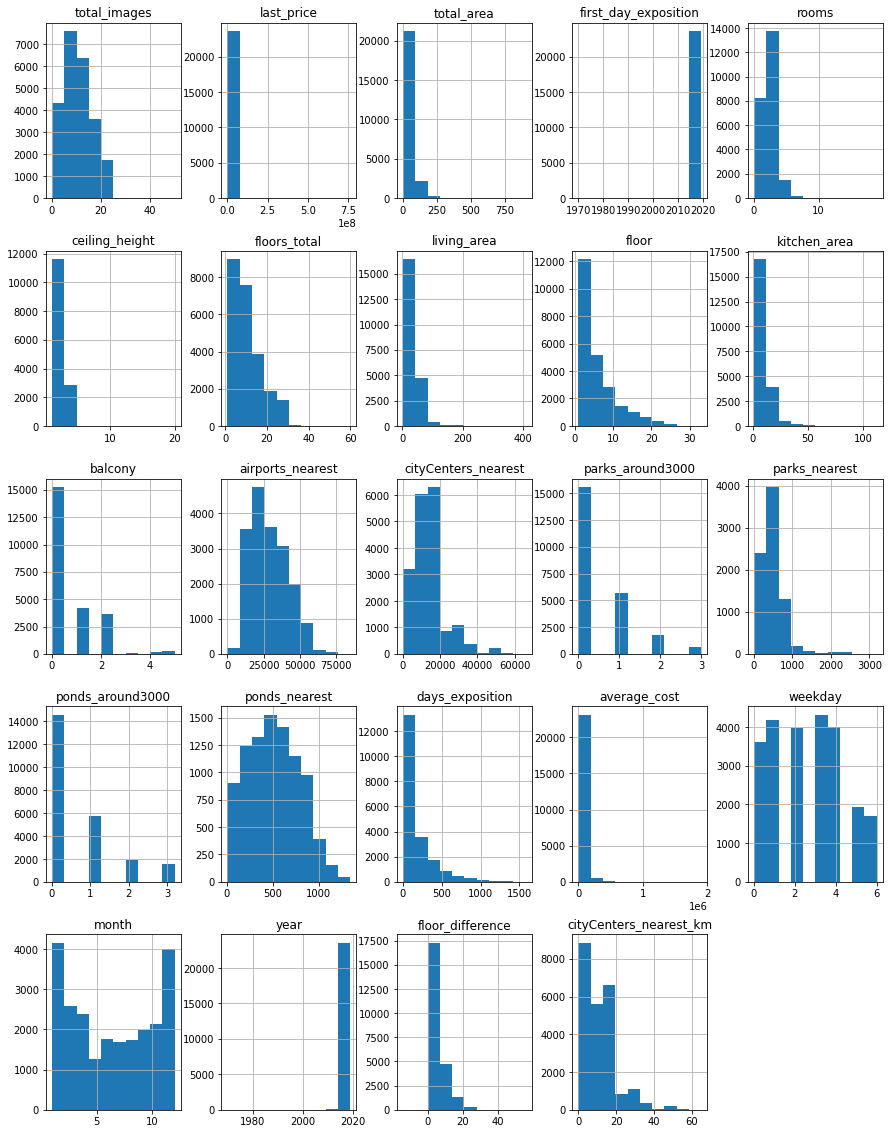

In [23]:
data.hist(figsize=(15, 20))
plt.show()

Изучаю полученные гистограммы более детально:

Строю гистограмму общей площади

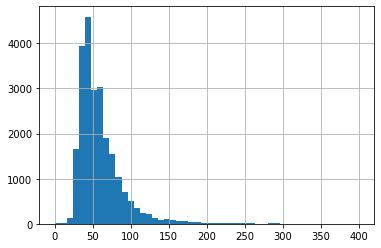

In [24]:
data['total_area'].hist(bins=50, range=(0, 400))
plt.show()

Гистограмма общей площади выглядит вполне нормально без каких-либо выбивающихся значений. Как и ожидалось, лишь малая часть квартир будет с высокой площадью

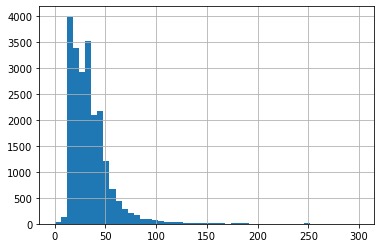

In [25]:
data['living_area'].hist(bins=50, range=(0, 300))
plt.show()

Гистограмма жилой площади выглядит примерно также, как и гистограмма общей площади, что также логично, она прямо пропорциональна общей площади квартиры. Показания не выбиваются из общей массы

Строю гистограмму площади кухни

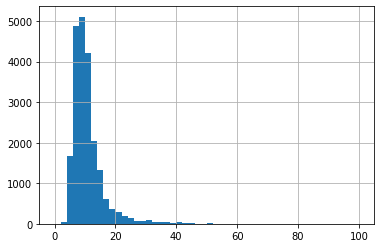

In [26]:
data['kitchen_area'].hist(bins=50, range=(0, 100))
plt.show()

Посмотрев на гистограмму площади кухни, можно сделать вывод, что она прямо пропорицональна общей площади квартиры

Строю гистограмму этажей

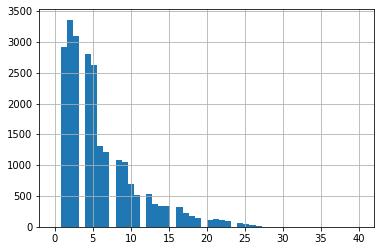

In [27]:
data['floor'].hist(bins=50, range=(0, 40))
plt.show()

Гистограмма этажей показывает, что гораздо больше квартир встречается с 1 по 5, а дальше идёт на спад

Строю гистограмму общего количества этажей в доме

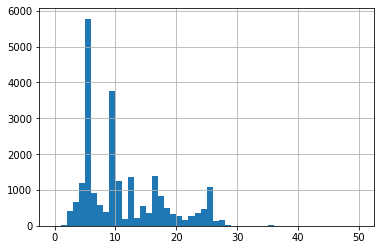

In [28]:
data['floors_total'].hist(bins=50, range=(0, 50))
plt.show()

Гистограмма общего количества этажей в доме также выглядит абсолютно логично без каких-либо выбивающихся значений

Строю гистограмму расстояния до центра в метрах

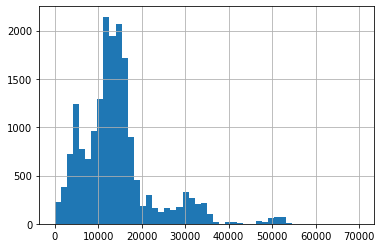

In [29]:
data['cityCenters_nearest'].hist(bins=50, range=(0, 70000))
plt.show()

Гистограмма расстояния до центра в метрах не выглядит абсолютно логично без каких-либо выбивающихся значений

Строю гистограмму расстояния до ближайшего аэропорта

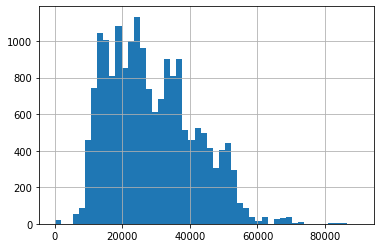

In [30]:
data['airports_nearest'].hist(bins=50, range=(0, 90000))
plt.show()

Гистограмма расстояния до ближайшего аэропорта очень похожа на гистограмму расстояния до центра в метрах, не является чем-то особенным

Строю гистограмму расстояния до ближайшего парка

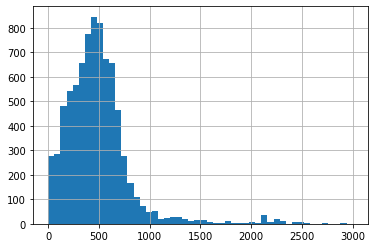

In [31]:
data['parks_nearest'].hist(bins=50, range=(0, 3000))
plt.show()

Гистограмма расстояния до ближайшего парка абсолютна идентична двум гистограммам, описанным выше

Строю гистограмму публикации объявлений по дням

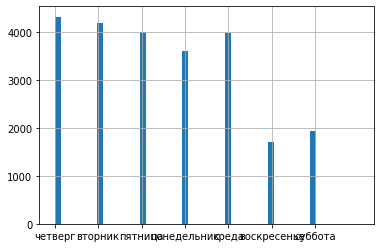

In [32]:
data['weekday_new'].hist(bins=50, range=(0, 7))
plt.show()

Что касается гистограммы публикации объявлений по дням, то здесь чётко видно, как неохотно люди занимаются этим в выходные, более, чем в 2 раза меньше, люди публикуют свои объявления в выходные дни

Строю гистограмму публикации объявлений по месяцам

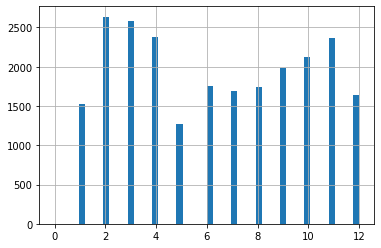

In [33]:
data['month'].hist(bins=50, range=(0, 12))
plt.show()

Гистограмма публикации объявлений по месяцам показывает, что люди чаще публикуют объявления в начале и конце года, к середине года их активность падает

Строю гистограмму по типу этажа

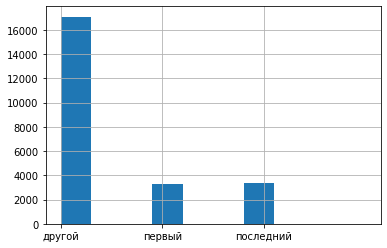

In [34]:
data['floor_categorize'].hist(bins=10, range=(0, 3))
plt.show()

На гистограмме распространения квартир по типам этажа видно, что гораздо больше квартир не на первом и последнем этажах, что вполне логично

Чтобы более детально рассмотреть гистограмму цены квартиры, приходится построить другую более показательную диаграмму. На гистограмме цены за квартиру мы видим, что цены поднимаются, на что нам указывает пик на значении 4 миллиона, а затем снова падают

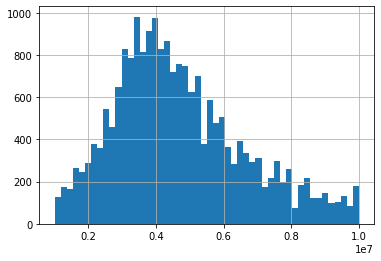

In [35]:
data['last_price'].hist(bins=50, range=(1000000, 10000000))
plt.show()

Чтобы более детально оценить столбец с количеством комнатми, нам также приходится построить диаграмму с другим числом корзин, минимальным и максимальными значениями. Гистограмма напоминает гистограмму со стоимостью квартир, из чего можно сделать вывод, что количество комнат также влияет на цену квартиры

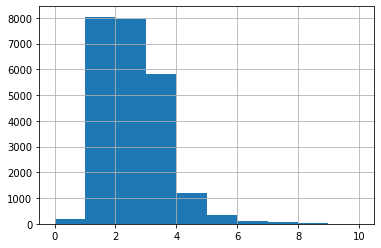

In [36]:
data['rooms'].hist(bins=10, range=(0, 10))
plt.show()

Чтобы более детально оценить столбец с высотой потолков, нам также приходится построить диаграмму с другим числом корзин, минимальным и максимальными значениями. На полученном графике мы видим, что высота потолков чаще всего бывает 2 метра, 3-4 метра встречается гораздо реже

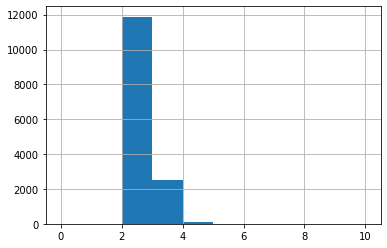

In [37]:
data['ceiling_height'].hist(bins=10, range=(0, 10))
plt.show()

Гистограмму типов этажей квартиры мы построить не можем, так как здесь отсутствуют цифровые значения, но мы можем построить точечную диаграмму рассеяния, где x - тип этажа квартиры, y - цена на момент снятия с публикации. По диаграмме видно, что квартиры на первом этаже чаще стоят дешевле, чем на других иои последних этажах.

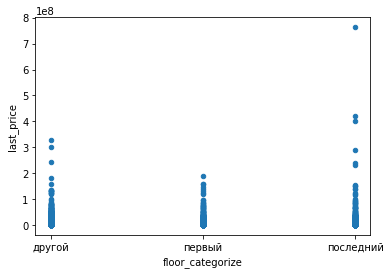

In [38]:
data.plot(x='floor_categorize', y='last_price', kind='scatter')
plt.show()

Строю гистограмму столбца "days_exposition"

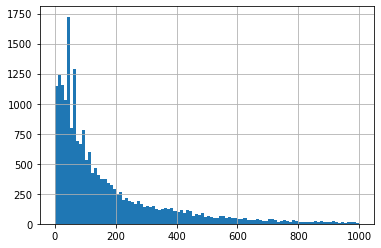

In [39]:
data['days_exposition'].hist(bins=100, range=(0, 1000))
plt.show()

Смотрю распределение данных столбца "days_exposition", чтобы после сделать вывод о быстрых и медленных продажах

In [40]:
data['days_exposition'].describe()

count    20523.000000
mean       180.736559
std        219.729659
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение по столбцу "сколько дней было размещено объявление (от публикации до снятия)" показывает 190. По данным, полученным выше, мы видим, что 25% квартир сдаётся за 43 дня, а 75% квартир за 246 дней. Быстрыми продажами можно считать те квартиры, которые были проданы за 43 дня и меньше, медленными продажами мы будем считать те квартиры, которые не были проданы за 245 дней

Строю графики, которые покажут зависимость цены от указанных ниже параметров:

Цена от общей площади

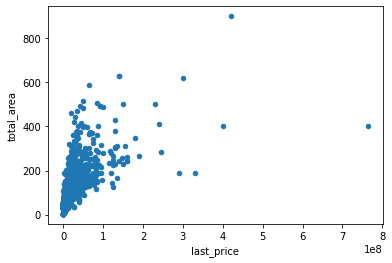

In [41]:
data.plot(x='last_price', y='total_area', kind='scatter')
plt.show()

Считаю коэффициент корреляции между параметрами "last_price" и "total_area"

In [42]:
data.last_price.corr(data.total_area)

0.6537583920756967

Цена от жилой площади

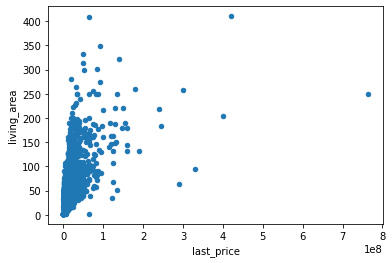

In [43]:
data.plot(x='last_price', y='living_area', kind='scatter')
plt.show()

Считаю коэффициент корреляции между параметрами "last_price" и "living_area"

In [44]:
data.last_price.corr(data.living_area)

0.5667943306562363

Цена от площади кухни

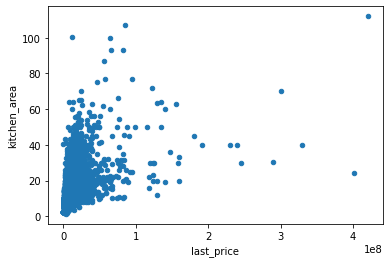

In [45]:
data.plot(x='last_price', y='kitchen_area', kind='scatter')
plt.show()

Считаю коэффициент корреляции между параметрами "last_price" и "kitchen_area"

In [46]:
data.last_price.corr(data.kitchen_area)

0.5201739181355342

Цена от количества комнат

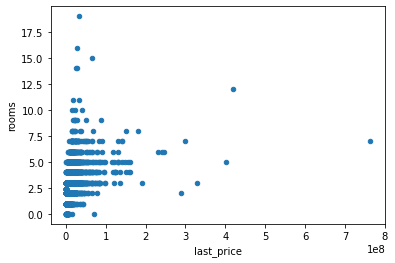

In [47]:
data.plot(x='last_price', y='rooms', kind='scatter')
plt.show()

Считаю коэффициент корреляции между параметрами "last_price" и "rooms"

In [48]:
data.last_price.corr(data.rooms)

0.36323000921224385

Цена от типа этажа, на котором расположена квартира (первый, последний, другой)

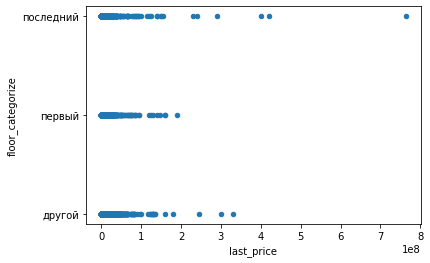

In [49]:
data.plot(x='last_price', y='floor_categorize', kind='scatter')
plt.show()

Цена от дня недели

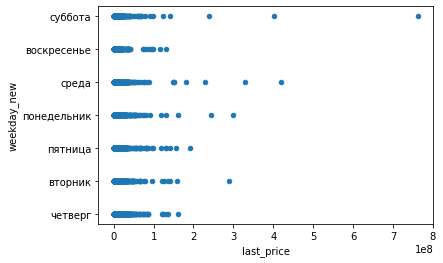

In [50]:
data.plot(x='last_price', y='weekday_new', kind='scatter')
plt.show()

Цена от месяца

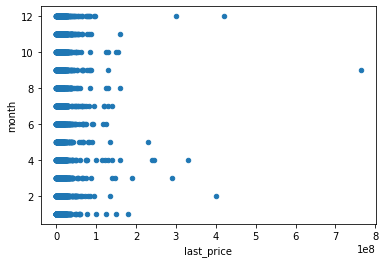

In [51]:
data.plot(x='last_price', y='month', kind='scatter')
plt.show()

Цена от года

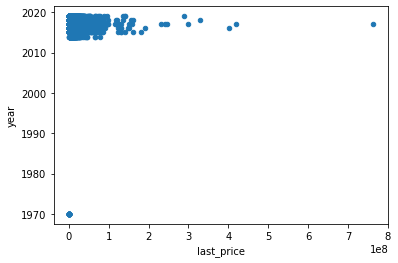

In [52]:
data.plot(x='last_price', y='year', kind='scatter')
plt.show()

Исходя из полученных выше 8 графиков, а также коэффициентов корреляции, где их было возможно получить (невозможно их получить в данных, где второе значение является не числовым (годе, месяц, день, категория этажа)), можем сделать вывод, от каких параметров наиболее зависит цена на квартиру. Самый большой коэффициент корреляции между ценой на квартиру и общей площадью (0.68), больше всего цена на квартиру зависит от общей площади. Чуть менее зависимый параметр это жилая площадь (0.6). Затем с коэффициентом 0.51 идёт площадь кухни и с наименьшая зависимость цены наблюдается от количества комнат (0.4). Что касается не числовых показателей, то видно, как сильно цена на квартиру зависит от этажа, на котором расположена квартира. Квартиры на первых этажах в среднем имеют цену ниже, чем на последних и других этажах. От дня недели, месяца и года, в которые было выложено объявление, также зависит цена. На графиках видно, что в 2014 году квартиры имели наименьшую цену, в 2015 цена увеличилась, а в 2016 она снова упала. В 2017 году цена была наивысшей относительно остальных годов. В 2018 и 2019 годах цены немного упали относительно 2017. Среди неудачных месяцев для публикации объявления можно выделить май, возможно это связано с летними каникулами. Наиболее же удачными месяцами можно считать февраль, ноябрь и декабрь. В выходные публикация объявлений тоже считается самым неудачным решением, на графике видно, что стоимость таких квартир наименьшая. 

Считаю среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [53]:
locality_name_sorted = data.groupby('locality_name')['average_cost'].agg(['count', 'mean', 'median']).sort_values(by='count', ascending=False)
print(locality_name_sorted.head(10))

                   count           mean         median
locality_name                                         
Санкт-Петербург    15709  114824.424343  104770.266315
Мурино               588   86064.821204   86175.643522
Кудрово              472   95324.930544   95675.473579
поселок Шушары       440   78677.364217   76876.172608
Всеволожск           398   68654.473986   65789.473684
Пушкин               369  103125.819291  100000.000000
Колпино              338   75424.579098   74723.748474
поселок Парголово    327   90175.913458   91642.857143
Гатчина              306   68757.678644   67860.569236
Выборг               237   58141.909153   58158.319871


Среди всех населённых пунктов с самой высокой стоимостью квадратного метра оказался Санкт-Петербург, не далеко от него ушёл Пушкин. С самой низкой стоимостью квадратного метра оказался Выборг, довольно близко к нему по цене Всеволожск и Гатчина. 

Выделяю все значения стоблца "locality_name" со значением "Санкт-Петербург" и вычисляю среднюю цену каждого километра

In [54]:
print(data[data['locality_name']=='Санкт-Петербург'].groupby('cityCenters_nearest_km')['last_price'].agg(['count', 'mean']).head(60))

                        count          mean
cityCenters_nearest_km                     
0                         147  2.022673e+07
1                         240  1.885085e+07
2                         307  1.616331e+07
3                         524  1.345377e+07
4                         907  1.363202e+07
5                         769  1.530612e+07
6                         470  1.438911e+07
7                         407  1.279767e+07
8                         667  8.449374e+06
9                         689  6.428270e+06
10                        911  6.378261e+06
11                       1415  5.977039e+06
12                       1514  5.972835e+06
13                       1400  6.025638e+06
14                       1512  5.769469e+06
15                       1372  5.546976e+06
16                       1106  5.527928e+06
17                        534  4.865574e+06
18                        174  5.334929e+06
19                         82  4.678756e+06
20                         83  6

Строю столбчатую диаграмму

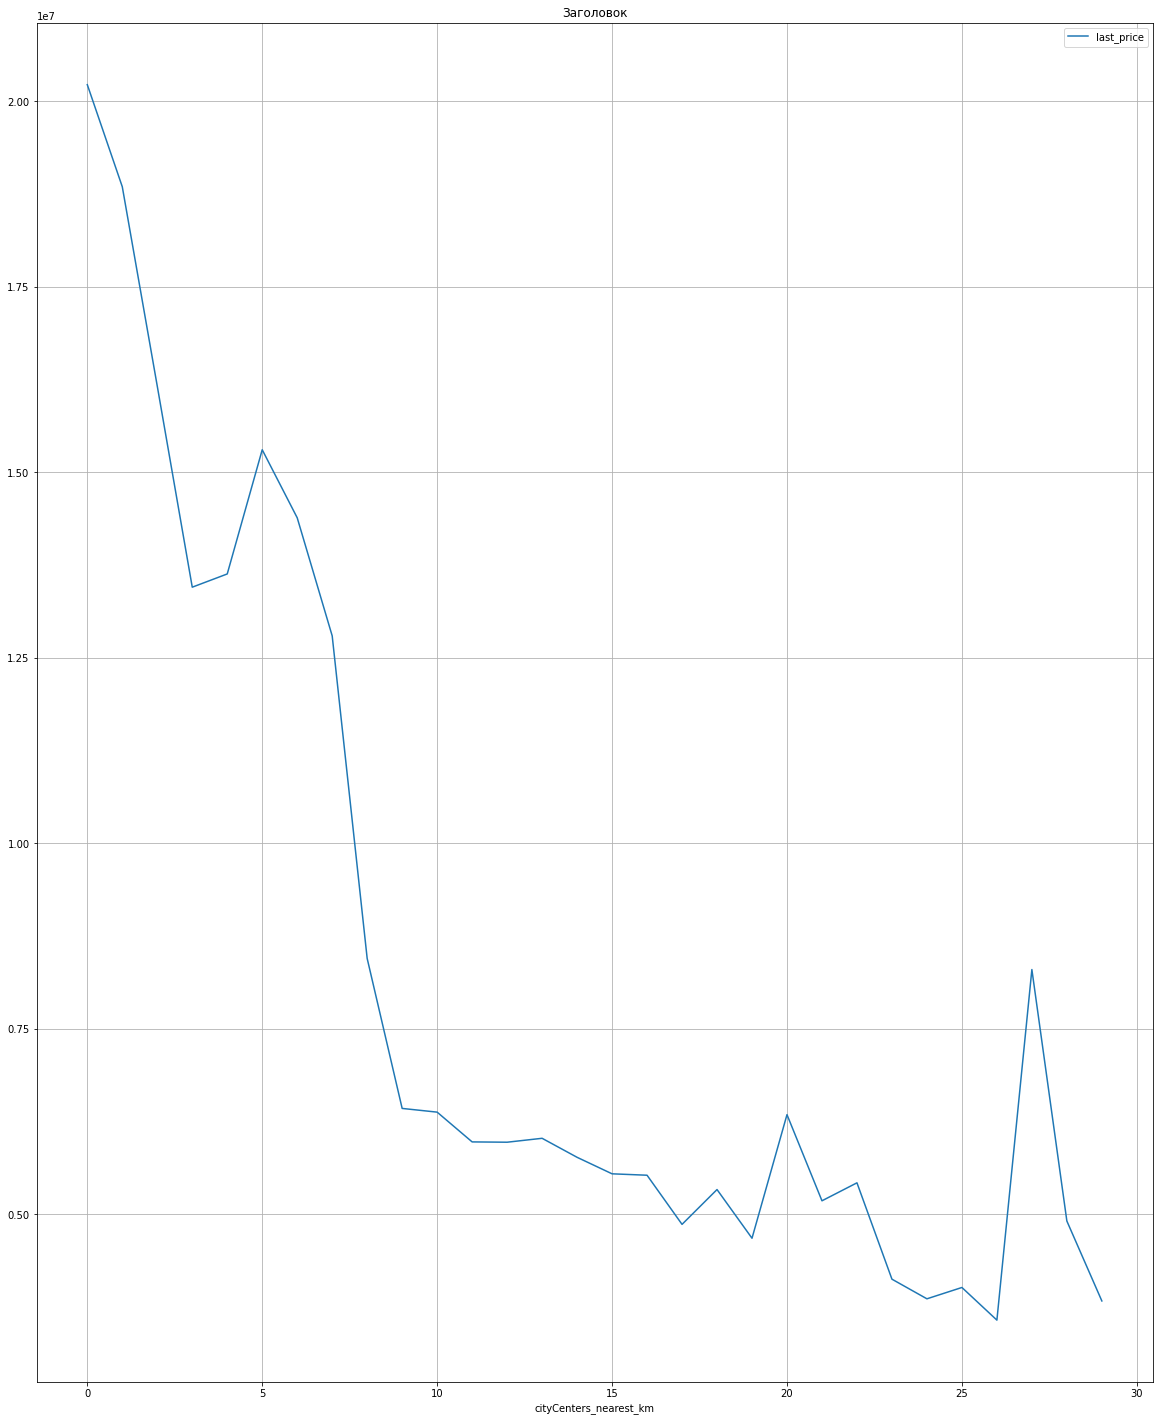

In [57]:
#data.pivot_table(index='cityCenters_nearest_km', values='last_price')
#data.query('locality_name == "Санкт-Петербург"').plot(y='last_price', kind='bar')
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price')\
    .plot(figsize=(20, 25), grid=True, title = 'Заголовок')
plt.show()

Судя по диаграмме, видно, что цена в Санкт Петербурге значительно зависит от удалённости от центра. Чем больше удалённость, тем ниже цена, самые дорогие квартиры находятся близко к центру. Есть два исключения либо выброса

Строю точечную диаграмму

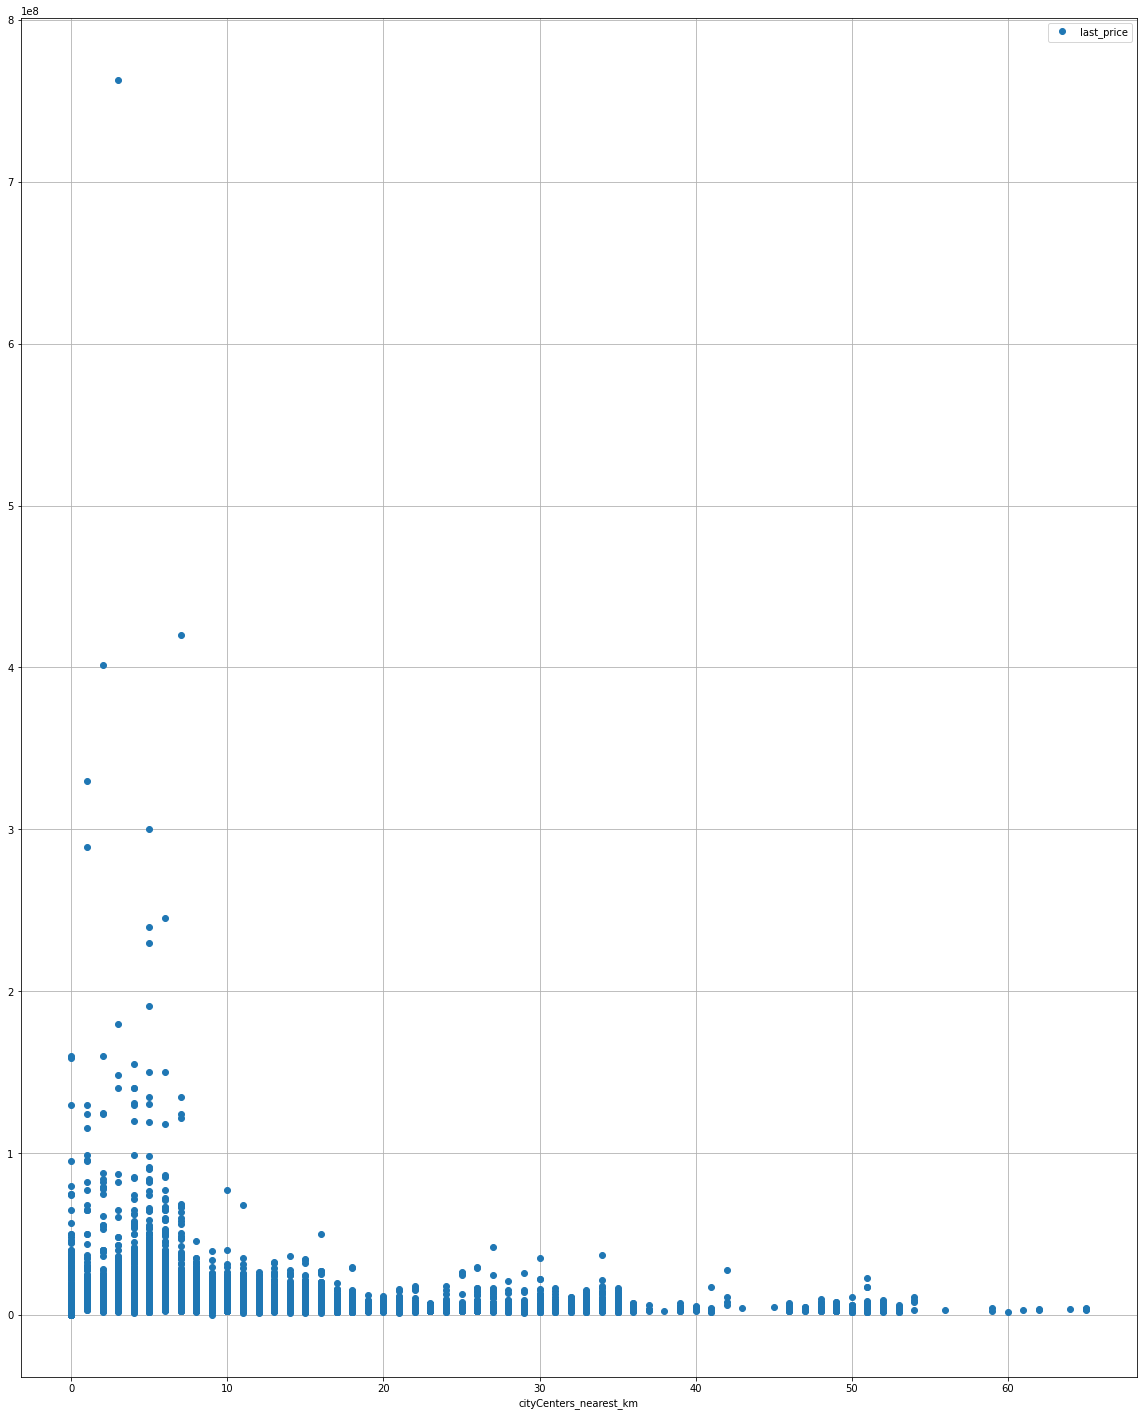

In [56]:
data.plot(x='cityCenters_nearest_km', y='last_price', style='o', figsize=(20, 25), grid=True)
plt.show()

Судя по диаграмме, видно, что цена значительно зависит от удалённости от центра. Чем больше удалённость, тем ниже цена, самые дорогие квартиры находятся близко к центру

### Общий вывод

Из всей проделанной работы можно сделать несколько интересных выводов, которые смогут повлиять на выбор квартиры, а также на то, в какой момент лучше всего публиковать объявление и что в нём указывать. Самые дорогие квартиры находятся в Санкт-Петербурге, чем выше общая площадь квартиры, тем выше и цена на неё, это касается как населённых пунктов помимо Санкт-Петербруга, так и самого города, там тоже цена зависит от удалённости от центра. Лучше всего публиковать объявления с продажей квартир в будний день в феврале, ноябре и декабре. От года публикации также многое зависит, но предсказать, какой год будет более удачным, какой - нет, не представляет возможности. Самыми дешёвыми же квартирами будут те, что расположены на 1 этаже, в населённых пунктах Красное село, Ломоносов и Колпино, а также с наименьшей жилой площадью

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод